In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.DataFrame(data={
    'NDVI': np.stack([np.linspace(0, 0.5, 20) for x in range(20)], axis=0).flatten(),
    'dNDVI': np.stack([np.linspace(-0.004, 0.005, 20) for x in range(20)], axis=1).flatten(),
    'Stock': np.repeat(0.5, 20*20)
})

In [42]:
df['VG'] = df.apply(lambda x: 1.19 + 14.0*x['NDVI'] + 176.6 * x['dNDVI'] - 5765.2*(x['NDVI'] * x['dNDVI']) -1.06 * x['Stock'], axis=1)

In [45]:
df['NDVI_bin'] = pd.cut(df['NDVI'],
                           bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                           labels=['V. Low', 'Low', 'Mod', 'High', 'V. High'])
df['dNDVI_bin'] = pd.cut(df['dNDVI'],
                           bins=[-0.005, -0.002, 0.0, 0.002, 0.004, 0.006],
                           labels=['V. Low', 'Low', 'Mod', 'High', 'V. High'])

<Axes: xlabel='dNDVI', ylabel='VG'>

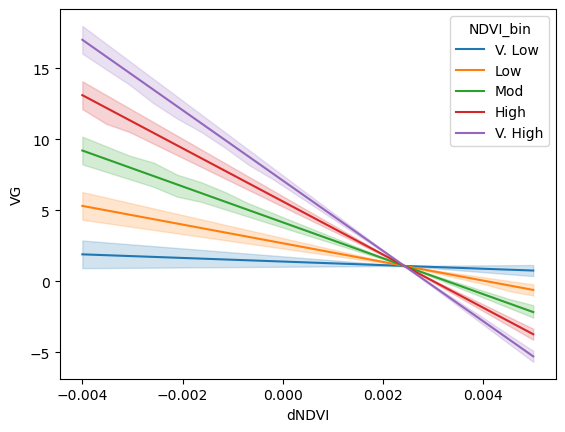

In [46]:
sns.lineplot(x='dNDVI', y='VG', hue='NDVI_bin', data=df)